Training set original class distribution: Counter({3: 150, 1: 146, 2: 24, 4: 23})
Training set modified class distribution: Counter({2: 150, 0: 146, 1: 24, 3: 23})


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        37
           1       0.20      0.17      0.18         6
           2       0.97      0.79      0.87        38
           3       0.80      0.80      0.80         5

    accuracy                           0.83        86
   macro avg       0.69      0.68      0.68        86
weighted avg       0.83      0.83      0.82        86

Accuracy Score: 0.8255813953488372


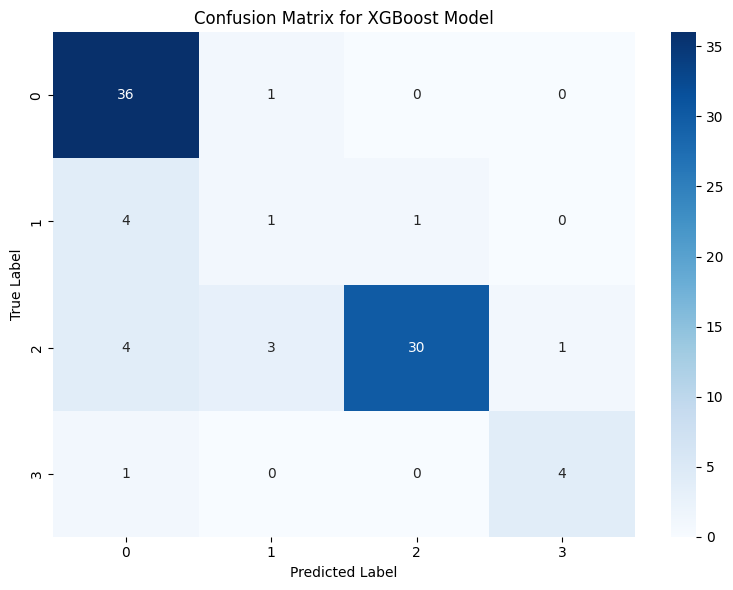

In [ ]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter


# Load the normalized dataset (after data cleaning)



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Load the normalized dataset (adjust the file path as needed)
df_norm = pd.read_csv('/content/sample_data/processed_dataset.csv', index_col=0)

# Define features and target (assuming 'FailureMode' is the target column)
X = df_norm.drop(columns=['FailureMode'])
y = df_norm['FailureMode']

# Convert categorical variables into dummy variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set original class distribution:", Counter(y_train))

# Convert target labels from [1, 2, 3, 4] to [0, 1, 2, 3]
y_train = y_train - 1
y_test = y_test - 1

print("Training set modified class distribution:", Counter(y_train))

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot and save the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Model")
plt.tight_layout()
plt.savefig("xgb_confusion_matrix.png")
plt.show()



Training set original class distribution: Counter({0: 120, 3: 120, 1: 120, 2: 120})
Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.84      0.90      0.87        30
           2       0.97      0.97      0.97        30
           3       0.97      1.00      0.98        30

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120

Accuracy Score (RandomForest): 0.925
Confusion Matrix:
[[25  5  0  0]
 [ 1 27  1  1]
 [ 1  0 29  0]
 [ 0  0  0 30]]


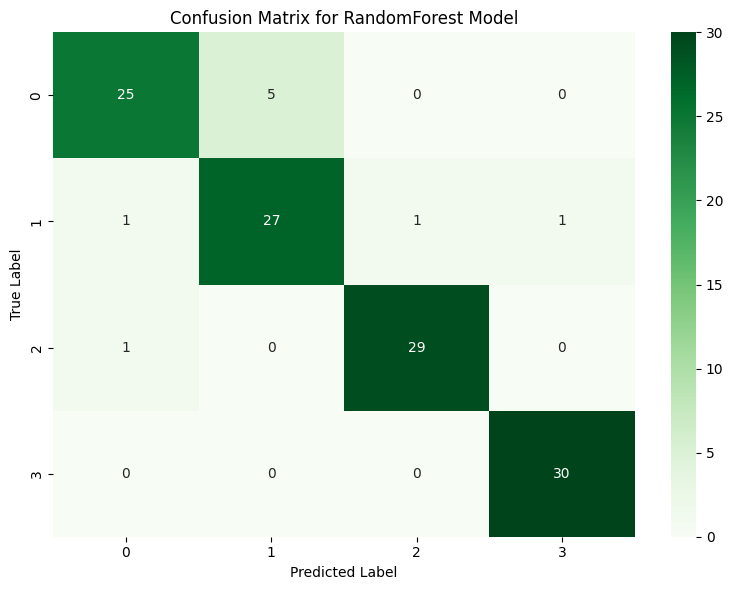


--- Key Performance Indicators ---
Accuracy: 0.9250
Precision (macro avg): 0.9260
Recall (macro avg): 0.9250
F1-Score (macro avg): 0.9246


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# -----------------------------
# 1. 数据加载与预处理
# -----------------------------

# 从指定文件加载归一化后的数据集
df_norm = pd.read_csv('/content/sample_data/train_smote_pca.csv', index_col=0)

# 定义特征（X）和目标（y）
X = df_norm.drop(columns=['failure mode'])
y = df_norm['failure mode']

# 如果存在分类变量，将其转为 dummy variables（one-hot encoding）
X = pd.get_dummies(X, drop_first=True)

# 调整目标标签：将原始 [1,2,3,4] 标签变换为 [0,1,2,3]（便于后续处理）
y = y - 1

# 使用 stratify 参数保证训练集和测试集中各类别分布一致，按 80%/20% 划分数据
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set original class distribution:", Counter(y_train))

# 对特征数据进行标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 2. 模型训练
# -----------------------------

# 创建并训练随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_rf = rf_classifier.predict(X_test_scaled)

# -----------------------------
# 3. 模型评估
# -----------------------------

# 输出分类报告与准确率
print("Classification Report (RandomForest):")
print(classification_report(y_test, y_pred_rf))
acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score (RandomForest):", acc)

# 计算混淆矩阵
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# -----------------------------
# 4. 绘制混淆矩阵
# -----------------------------

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RandomForest Model")
plt.tight_layout()
plt.savefig("rf_confusion_matrix.png")
plt.show()

# -----------------------------
# 5. 进一步提取关键指标（Accuracy, Precision, Recall, F1-Score）
# -----------------------------

# 将分类报告转换为字典格式（这里直接使用 y_test 和 y_pred_rf）
report_dict = classification_report(y_test, y_pred_rf, output_dict=True)

# 提取总体准确率（accuracy）
overall_accuracy = report_dict['accuracy']

# 提取宏平均指标（macro avg）: 当类别之间平衡时可以使用
macro_precision = report_dict['macro avg']['precision']
macro_recall = report_dict['macro avg']['recall']
macro_f1 = report_dict['macro avg']['f1-score']

# 如果希望使用加权平均指标（weighted avg），可以使用以下方法：
weighted_precision = report_dict['weighted avg']['precision']
weighted_recall = report_dict['weighted avg']['recall']
weighted_f1 = report_dict['weighted avg']['f1-score']

# 打印关键指标（这里使用宏平均为示例）
print("\n--- Key Performance Indicators ---")
print(f"Accuracy: {overall_accuracy:.4f}")
print(f"Precision (macro avg): {macro_precision:.4f}")
print(f"Recall (macro avg): {macro_recall:.4f}")
print(f"F1-Score (macro avg): {macro_f1:.4f}")

# 如果想使用 weighted avg，只需替换上面的宏平均指标即可
# print(f"Precision (weighted avg): {weighted_precision:.4f}")
# print(f"Recall (weighted avg): {weighted_recall:.4f}")
# print(f"F1-Score (weighted avg): {weighted_f1:.4f}")


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
from sklearn.metrics import confusion_matrix, classification_report

# --- Part 1: Load and Prepare Data ---

# Load the normalized dataset. Adjust the file path if needed.
df_norm = pd.read_csv('/content/sample_data/train_smote_pca.csv', index_col=0)

# Assume 'failure mode' is the target; convert labels from [1,2,3,4] to [0,1,2,3].
y = df_norm['failure mode'] - 1
X = df_norm.drop(columns=['failure mode']).values

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# --- Part 2: Create an Episode for Few-Shot Learning ---

def create_episode(X, y, num_support_per_class, num_query_per_class, num_classes):
    """
    Creates an episode for few-shot learning.
    For each class (0 to num_classes-1), it randomly samples num_support_per_class
    examples for the support set and num_query_per_class examples for the query set.
    """
    support_x_list, support_y_list = [], []
    query_x_list, query_y_list = [], []

    for c in range(num_classes):
        # Get indices where the label equals c
        indices = np.where(y == c)[0]
        # Shuffle indices randomly
        random.shuffle(indices)
        # Check if enough samples exist
        if len(indices) < num_support_per_class + num_query_per_class:
            raise ValueError(
                f"Not enough samples for class {c}. "
                f"Needed: {num_support_per_class + num_query_per_class}, Got: {len(indices)}"
            )
        # Split indices for support and query sets
        support_indices = indices[:num_support_per_class]
        query_indices = indices[num_support_per_class:num_support_per_class + num_query_per_class]

        # Collect data
        support_x_list.append(X[support_indices])
        support_y_list.append(y[support_indices])
        query_x_list.append(X[query_indices])
        query_y_list.append(y[query_indices])

    # Concatenate all classes' data
    support_x = np.concatenate(support_x_list, axis=0)
    support_y = np.concatenate(support_y_list, axis=0)
    query_x = np.concatenate(query_x_list, axis=0)
    query_y = np.concatenate(query_y_list, axis=0)

    return support_x, support_y, query_x, query_y

# Define the number of classes and the size of support and query sets (example: 5 per class)
num_classes = 4
num_support_per_class = 5
num_query_per_class = 5

# Create an episode from the training data.
support_x_np, support_y_np, query_x_np, query_y_np = create_episode(
    X, y, num_support_per_class, num_query_per_class, num_classes
)

# Convert arrays to PyTorch tensors
support_x = torch.tensor(support_x_np, dtype=torch.float)
support_y = torch.tensor(support_y_np, dtype=torch.long)
query_x = torch.tensor(query_x_np, dtype=torch.float)
query_y = torch.tensor(query_y_np, dtype=torch.long)

# --- Part 3: Define Matching Networks Model ---

# Define the embedding network used by the Matching Networks.
class EmbeddingNet(nn.Module):
    def __init__(self, input_size, hidden_size, embedding_size):
        super(EmbeddingNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, embedding_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Matching Networks model.
class MatchingNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, embedding_size, num_classes):
        super(MatchingNetwork, self).__init__()
        self.embedding = EmbeddingNet(input_size, hidden_size, embedding_size)
        self.num_classes = num_classes

    def forward(self, support_x, support_y, query_x):
        # Compute embeddings for support and query sets.
        support_embed = self.embedding(support_x)      # (num_support, embedding_size)
        query_embed = self.embedding(query_x)          # (num_query, embedding_size)

        # Normalize embeddings.
        support_embed = F.normalize(support_embed, p=2, dim=1)
        query_embed = F.normalize(query_embed, p=2, dim=1)

        # Compute cosine similarity.
        similarities = torch.matmul(query_embed, support_embed.t())  # (num_query, num_support)
        attention = F.softmax(similarities, dim=1)

        # Convert support labels to one-hot encoding.
        support_y_onehot = F.one_hot(support_y, num_classes=self.num_classes).float()

        # Compute weighted sum of support labels.
        output = torch.matmul(attention, support_y_onehot)  # (num_query, num_classes)
        return output

# Set hyperparameters.
input_size = X.shape[1]       # Number of features.
hidden_size = 64
embedding_size = 32
num_classes = 4

# Create the model instance.
model = MatchingNetwork(input_size, hidden_size, embedding_size, num_classes)

# --- Part 4: Training the Matching Network on the Episode ---

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
optimizer.zero_grad()

outputs = model(support_x, support_y, query_x)  # (num_query, num_classes)

loss = criterion(outputs, query_y)
loss.backward()
optimizer.step()

print("Training Loss:", loss.item())

# --- Part 5: Evaluation of the Episode ---

# Get predicted labels for the query set.
_, predicted = torch.max(outputs, 1)

print("Query Labels:", query_y.tolist())
print("Predicted Labels:", predicted.tolist())

# Compute episode accuracy (basic way).
episode_accuracy = (predicted == query_y).float().mean().item()
print("Episode Accuracy:", episode_accuracy)

# Convert query labels and predictions to numpy arrays for confusion matrix.
query_labels_np = query_y.detach().cpu().numpy()
predicted_np = predicted.detach().cpu().numpy()

# Compute confusion matrix.
cm = confusion_matrix(query_labels_np, predicted_np)
print("Confusion Matrix:")
print(cm)

# Print detailed classification report (per-class metrics).
print("Detailed Classification Report:")
print(classification_report(query_labels_np, predicted_np))

# 如果你只想打印图中类似的四项关键指标（Accuracy、Precision、Recall、F1-Score），
# 可以将 classification_report 的输出转为字典，然后提取感兴趣的字段，如下：
report_dict = classification_report(query_labels_np, predicted_np, output_dict=True)

# report_dict 中会包含 'accuracy'、'macro avg'、'weighted avg' 等字段
accuracy = report_dict['accuracy']
precision = report_dict['macro avg']['precision']
recall = report_dict['macro avg']['recall']
f1_score = report_dict['macro avg']['f1-score']

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"F1-Score (macro avg): {f1_score:.4f}")


Training Loss: 1.3681532144546509
Query Labels: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
Predicted Labels: [0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 3, 0, 3, 3, 3]
Episode Accuracy: 0.550000011920929
Confusion Matrix:
[[2 2 1 0]
 [0 2 3 0]
 [0 2 3 0]
 [1 0 0 4]]
Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.33      0.40      0.36         5
           2       0.43      0.60      0.50         5
           3       1.00      0.80      0.89         5

    accuracy                           0.55        20
   macro avg       0.61      0.55      0.56        20
weighted avg       0.61      0.55      0.56        20

Accuracy: 0.5500
Precision (macro avg): 0.6071
Recall (macro avg): 0.5500
F1-Score (macro avg): 0.5631


In [ ]:
df_norm = pd.read_csv('/content/sample_data/train_smote_pca.csv', index_col=0)

KeyError: "['failure_mode'] not found in axis"

Training set original class distribution: Counter({0: 120, 3: 120, 1: 120, 2: 120})
Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.83      0.83      0.78        30
           1       0.84      0.80      0.77        30
           2       0.87      0.87      0.87        30
           3       0.87      0.87      0.88        30

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.82       120
weighted avg       0.83      0.83      0.82       120

Accuracy Score (RandomForest): 0.825
Confusion Matrix:
[[25  5  0  0]
 [ 1 27  1  1]
 [ 1  0 29  0]
 [ 0  0  0 30]]

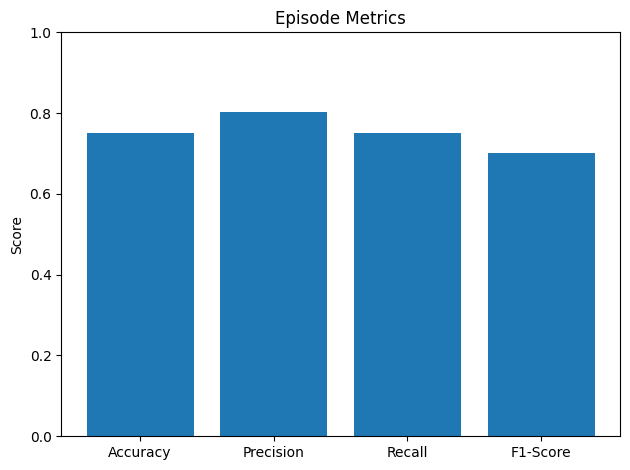

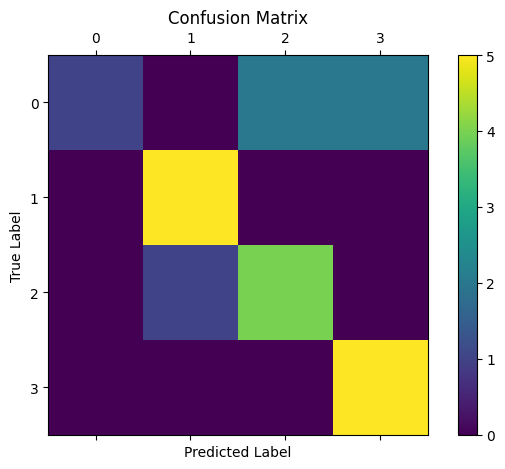

In [ ]:
import matplotlib.pyplot as plt

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}

fig, ax = plt.subplots()
ax.bar(metrics.keys(), metrics.values())
ax.set_ylabel('Score')
ax.set_title('Episode Metrics')
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
im = ax.matshow(cm, interpolation='nearest')
fig.colorbar(im, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticklabels([0,1,2,3])
ax.set_yticklabels([0,1,2,3])
plt.tight_layout()
plt.show()


=== Baseline 5-Fold CV ===

-- original (train shape: (343, 68)) --
LogisticRegression Fold1: Acc=0.8551 F1=0.7064 Rec=0.7375
LogisticRegression Fold2: Acc=0.8986 F1=0.7582 Rec=0.7744
LogisticRegression Fold3: Acc=0.9275 F1=0.8267 Rec=0.7914
LogisticRegression Fold4: Acc=0.9118 F1=0.7896 Rec=0.8244
LogisticRegression Fold5: Acc=0.9412 F1=0.8643 Rec=0.8292
LogisticRegression Avg → Acc=0.9068, F1=0.7891, Rec=0.7914

RandomForest Fold1: Acc=0.8696 F1=0.7467 Rec=0.7458
RandomForest Fold2: Acc=0.9130 F1=0.7848 Rec=0.7414
RandomForest Fold3: Acc=0.9130 F1=0.7691 Rec=0.7414
RandomForest Fold4: Acc=0.9265 F1=0.8188 Rec=0.7789
RandomForest Fold5: Acc=0.8824 F1=0.7397 Rec=0.7119
RandomForest Avg → Acc=0.9009, F1=0.7718, Rec=0.7439

GradientBoosting Fold1: Acc=0.8261 F1=0.6852 Rec=0.6792
GradientBoosting Fold2: Acc=0.9130 F1=0.7848 Rec=0.7414
GradientBoosting Fold3: Acc=0.9130 F1=0.8022 Rec=0.7417
GradientBoosting Fold4: Acc=0.8676 F1=0.7276 Rec=0.7447
GradientBoosting Fold5: Acc=0.8971 F1=0.7921

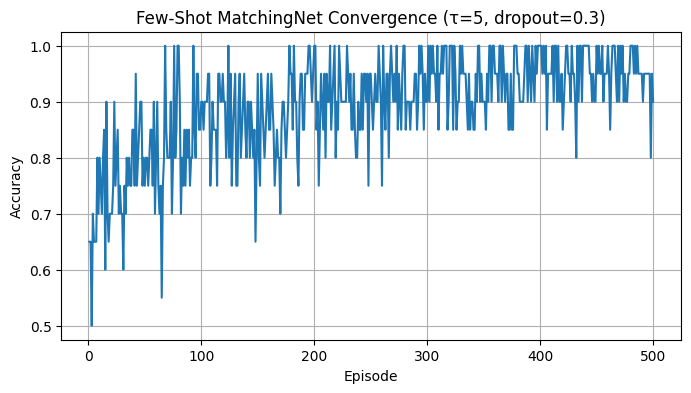


Average Episodic Accuracy: 0.8925


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score
)

# --- Config & Seed ---
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# --- Data files ---
dataset_files = {
    'original':   ('/content/sample_data/train_original.csv',    '/content/sample_data/test_original.csv'),
    'pca':        ('/content/sample_data/train_pca.csv',         '/content/sample_data/test_pca.csv'),
    'smote':      ('/content/sample_data/train_smote.csv',       '/content/sample_data/test_smote.csv'),
    'smote_pca':  ('/content/sample_data/train_smote_pca.csv',   '/content/sample_data/test_smote_pca.csv'),
    'default':    ('/content/sample_data/train.csv',             '/content/sample_data/test.csv'),
}

# --- Utility: Load & Preprocess ---
def load_and_prepare(name):
    train_fp, test_fp = dataset_files[name]
    df_tr = pd.read_csv(train_fp, index_col=0)
    df_te = pd.read_csv(test_fp,  index_col=0)
    # detect label column
    for col in ['failure mode','FailureMode','Failure Mode','failure_mode']:
        if col in df_tr.columns:
            target = col
            break
    else:
        raise KeyError(f"[{name}] no label column in {train_fp}")
    # features + labels
    X_tr = df_tr.drop(columns=[target]).values
    y_tr = df_tr[target].values - 1
    X_te = df_te.drop(columns=[target]).values
    y_te = df_te[target].values - 1
    # SMOTE if needed
    if name in ('smote','smote_pca'):
        X_tr, y_tr = SMOTE(random_state=SEED).fit_resample(X_tr, y_tr)
    # PCA if needed
    if name in ('pca','smote_pca'):
        pca = PCA(n_components=0.95, random_state=SEED)
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    return X_tr, y_tr, X_te, y_te

# --- Part A: Baseline 5-Fold CV ---
print("=== Baseline 5-Fold CV ===")
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=SEED),
    'RandomForest':       RandomForestClassifier(n_estimators=100, random_state=SEED),
    'GradientBoosting':   GradientBoostingClassifier(n_estimators=100, random_state=SEED),
}

for name in dataset_files:
    X_tr, y_tr, _, _ = load_and_prepare(name)
    print(f"\n-- {name} (train shape: {X_tr.shape}) --")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    for mname, model in models.items():
        accs, f1s, recs = [], [], []
        for fold, (i_train, i_val) in enumerate(skf.split(X_tr, y_tr), 1):
            model.fit(X_tr[i_train], y_tr[i_train])
            preds = model.predict(X_tr[i_val])
            accs.append(accuracy_score(y_tr[i_val], preds))
            f1s.append(f1_score(y_tr[i_val], preds, average='macro'))
            recs.append(recall_score(y_tr[i_val], preds, average='macro'))
            print(f"{mname} Fold{fold}: Acc={accs[-1]:.4f} F1={f1s[-1]:.4f} Rec={recs[-1]:.4f}")
        print(f"{mname} Avg → Acc={np.mean(accs):.4f}, F1={np.mean(f1s):.4f}, Rec={np.mean(recs):.4f}\n")

# --- Part B: Few-Shot Convergence with Best Hyperparams ---
# Episode sampler
def create_episode(X, y, k_sup=5, k_qry=5, n_cls=4):
    sx, sy, qx, qy = [], [], [], []
    for c in range(n_cls):
        idx = np.where(y == c)[0]
        np.random.shuffle(idx)
        sup, qry = idx[:k_sup], idx[k_sup:k_sup+k_qry]
        sx.append(X[sup]); sy.append(y[sup])
        qx.append(X[qry]); qy.append(y[qry])
    return (
        torch.tensor(np.vstack(sx), dtype=torch.float),
        torch.tensor(np.hstack(sy), dtype=torch.long),
        torch.tensor(np.vstack(qx), dtype=torch.float),
        torch.tensor(np.hstack(qy), dtype=torch.long)
    )

# MatchingNet with best params
class EmbeddingNet(nn.Module):
    def __init__(self, in_dim, hidden_dim, embed_dim, dropout_rate=0.3):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.ln1 = nn.LayerNorm(hidden_dim)
        self.drop = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, embed_dim)
    def forward(self, x):
        x = F.relu(self.ln1(self.fc1(x)))
        x = self.drop(x)
        return self.fc2(x)

class MatchingNet(nn.Module):
    def __init__(self, in_dim, hidden_dim, embed_dim, n_cls, temp=5.0, dropout_rate=0.3):
        super().__init__()
        self.embed = EmbeddingNet(in_dim, hidden_dim, embed_dim, dropout_rate)
        self.temp = temp
        self.n_cls = n_cls
    def forward(self, sx, sy, qx):
        se = F.normalize(self.embed(sx), p=2, dim=1)
        qe = F.normalize(self.embed(qx), p=2, dim=1)
        sims = torch.matmul(qe, se.t()) * self.temp
        attn = F.softmax(sims, dim=1)
        oh = F.one_hot(sy, num_classes=self.n_cls).float()
        return torch.matmul(attn, oh)

# Prepare SMOTE+PCA data
X_raw, y_raw = load_and_prepare('smote_pca')[:2]
X_sm, y_sm   = SMOTE(random_state=SEED).fit_resample(X_raw, y_raw)
pca          = PCA(n_components=0.95, random_state=SEED)
X_all        = pca.fit_transform(X_sm)
y_all        = y_sm

# Instantiate & train for many episodes
model         = MatchingNet(X_all.shape[1], 128, 64, 4, temp=5.0, dropout_rate=0.3)
opt           = optim.Adam(model.parameters(), lr=1e-3)
crit          = nn.CrossEntropyLoss()
NUM_EPISODES  = 500
k_support, k_query = 5, 5

episode_accs = []
model.train()
for ep in range(1, NUM_EPISODES+1):
    sx, sy, qx, qy = create_episode(X_all, y_all, k_support, k_query)
    opt.zero_grad()
    out = model(sx, sy, qx)
    loss = crit(out, qy)
    loss.backward()
    opt.step()
    with torch.no_grad():
        preds = out.argmax(1)
        episode_accs.append((preds == qy).float().mean().item())
    if ep % 100 == 0:
        print(f"Episode {ep}/{NUM_EPISODES} → Acc={episode_accs[-1]:.4f}")

# Plot convergence
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, NUM_EPISODES+1), episode_accs, label='Accuracy')
plt.xlabel("Episode")
plt.ylabel("Accuracy")
plt.title("Few-Shot MatchingNet Convergence (τ=5, dropout=0.3)")
plt.grid(True)
plt.show()

print(f"\nAverage Episodic Accuracy: {np.mean(episode_accs):.4f}")


Episode 100/500 → Acc=1.0000, F1=1.0000, Rec=1.0000
Episode 200/500 → Acc=1.0000, F1=1.0000, Rec=1.0000
Episode 300/500 → Acc=1.0000, F1=1.0000, Rec=1.0000
Episode 400/500 → Acc=0.9500, F1=0.9495, Rec=0.9500
Episode 500/500 → Acc=1.0000, F1=1.0000, Rec=1.0000

Average Episodic Accuracy : 0.9791
Average Episodic Macro-F1 : 0.9789
Average Episodic Recall   : 0.9791


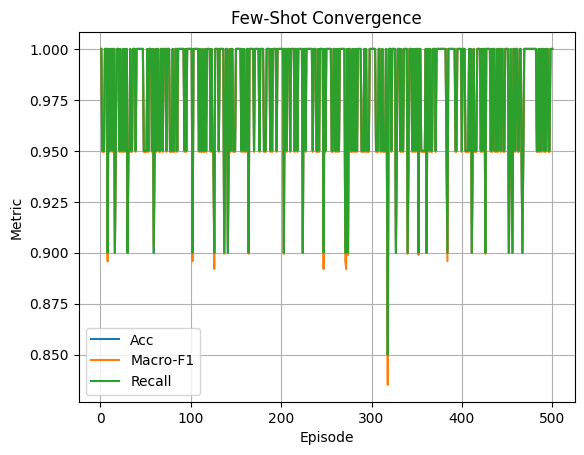


=== Final Test-Set Performance ===
Accuracy    : 0.8488
Macro-F1    : 0.7195
Macro-Recall: 0.7302

Classification Report:
              precision    recall  f1-score   support

           0     0.8500    0.9189    0.8831        37
           1     0.4000    0.3333    0.3636         6
           2     0.9429    0.8684    0.9041        38
           3     0.6667    0.8000    0.7273         5

    accuracy                         0.8488        86
   macro avg     0.7149    0.7302    0.7195        86
weighted avg     0.8490    0.8488    0.8471        86



In [ ]:
from sklearn.metrics import f1_score, recall_score

# --- Part B: Few-Shot Convergence with Best Hyperparams (改) ---
# ……前面与之前一致的准备代码，直到：
model.train()

episode_accs = []
episode_f1s  = []
episode_recs = []

for ep in range(1, NUM_EPISODES+1):
    sx, sy, qx, qy = create_episode(X_all, y_all, k_support, k_query)
    opt.zero_grad()
    out = model(sx, sy, qx)
    loss = crit(out, qy)
    loss.backward()
    opt.step()

    with torch.no_grad():
        preds = out.argmax(1)
        acc = (preds == qy).float().mean().item()
        # 计算本集的 Macro-F1 / Macro-Recall
        f1  = f1_score(qy.cpu().numpy(), preds.cpu().numpy(), average='macro')
        rec = recall_score(qy.cpu().numpy(), preds.cpu().numpy(), average='macro')

    episode_accs.append(acc)
    episode_f1s.append(f1)
    episode_recs.append(rec)

    if ep % 100 == 0:
        print(f"Episode {ep}/{NUM_EPISODES} → Acc={acc:.4f}, F1={f1:.4f}, Rec={rec:.4f}")

# 最后输出平均指标
print(f"\nAverage Episodic Accuracy : {np.mean(episode_accs):.4f}")
print(f"Average Episodic Macro-F1 : {np.mean(episode_f1s):.4f}")
print(f"Average Episodic Recall   : {np.mean(episode_recs):.4f}")

# （可选）绘制收敛曲线
plt.plot(range(1, NUM_EPISODES+1), episode_accs, label='Acc')
plt.plot(range(1, NUM_EPISODES+1), episode_f1s,  label='Macro-F1')
plt.plot(range(1, NUM_EPISODES+1), episode_recs, label='Recall')
plt.xlabel("Episode"); plt.ylabel("Metric")
plt.legend(); plt.title("Few-Shot Convergence"); plt.grid(True)
plt.show()
# --- 在完整测试集上评估 ---
# 1) 加载测试集（仅 PCA，不用 SMOTE）
_, _, X_te_raw, y_te_raw = load_and_prepare('smote_pca')
X_te = pca.transform(X_te_raw)           # 与训练时相同的 PCA
y_te = y_te_raw

# 2) 构造张量
te_x = torch.tensor(X_te, dtype=torch.float)
# 取全部 support 最后一次的 support_x/support_y 也可以重新用 create_episode，但通常直接用全量训练 support:
sup_x = torch.tensor(X_all, dtype=torch.float)
sup_y = torch.tensor(y_all, dtype=torch.long)

# 3) 预测
model.eval()
with torch.no_grad():
    out_te = model(sup_x, sup_y, te_x)
    preds = out_te.argmax(1).cpu().numpy()

# 4) 计算并输出
acc_test       = accuracy_score(y_te, preds)
f1_test        = f1_score(y_te, preds, average='macro')
recall_test    = recall_score(y_te, preds, average='macro')

print("\n=== Final Test-Set Performance ===")
print(f"Accuracy    : {acc_test:.4f}")
print(f"Macro-F1    : {f1_test:.4f}")
print(f"Macro-Recall: {recall_test:.4f}")
print("\nClassification Report:")
print(classification_report(y_te, preds, digits=4))



=== Baseline 5-Fold CV (train_smote) ===
LogisticRegression Fold1: Acc=0.9750 F1=0.9749 Rec=0.9750
LogisticRegression Fold2: Acc=0.9500 F1=0.9494 Rec=0.9500
LogisticRegression Fold3: Acc=0.9417 F1=0.9402 Rec=0.9417
LogisticRegression Fold4: Acc=0.9500 F1=0.9502 Rec=0.9500
LogisticRegression Fold5: Acc=0.9417 F1=0.9421 Rec=0.9417
LogisticRegression Avg → Acc=0.9517, F1=0.9513, Rec=0.9517

RandomForest Fold1: Acc=0.9750 F1=0.9747 Rec=0.9750
RandomForest Fold2: Acc=0.9833 F1=0.9832 Rec=0.9833
RandomForest Fold3: Acc=0.9500 F1=0.9495 Rec=0.9500
RandomForest Fold4: Acc=0.9667 F1=0.9666 Rec=0.9667
RandomForest Fold5: Acc=0.9667 F1=0.9668 Rec=0.9667
RandomForest Avg → Acc=0.9683, F1=0.9682, Rec=0.9683

GradientBoosting Fold1: Acc=0.9500 F1=0.9495 Rec=0.9500
GradientBoosting Fold2: Acc=0.9583 F1=0.9580 Rec=0.9583
GradientBoosting Fold3: Acc=0.9333 F1=0.9325 Rec=0.9333
GradientBoosting Fold4: Acc=0.9667 F1=0.9666 Rec=0.9667
GradientBoosting Fold5: Acc=0.9417 F1=0.9419 Rec=0.9417
GradientBoostin

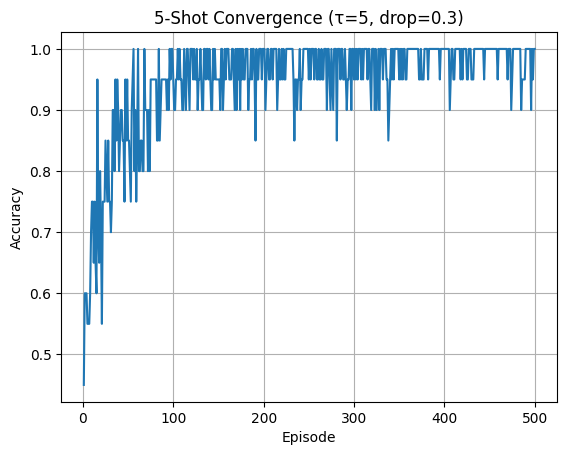


Average Episodic Accuracy: 0.9460

=== Final Test-Set Performance ===
Accuracy    : 0.8372
Macro-F1    : 0.7006
Macro-Recall: 0.7236

Classification Report:
              precision    recall  f1-score   support

           0     0.8500    0.9189    0.8831        37
           1     0.4000    0.3333    0.3636         6
           2     0.9412    0.8421    0.8889        38
           3     0.5714    0.8000    0.6667         5

    accuracy                         0.8372        86
   macro avg     0.6907    0.7236    0.7006        86
weighted avg     0.8427    0.8372    0.8368        86



In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, classification_report
)

# --- Config & Seed ---
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# --- File paths ---
train_fp = '/content/sample_data/train_smote.csv'
test_fp  = '/content/sample_data/test_original.csv'

# --- Part A: Load & Preprocess ---
df_tr = pd.read_csv(train_fp, index_col=0)
df_te = pd.read_csv(test_fp,  index_col=0)
# detect label column
for col in ['failure mode','FailureMode','Failure Mode','failure_mode']:
    if col in df_tr.columns:
        target = col
        break
else:
    raise KeyError(f"No label column in {train_fp}")
# split features & labels
X_tr = df_tr.drop(columns=[target]).values
y_tr = df_tr[target].values - 1
X_te = df_te.drop(columns=[target]).values
y_te = df_te[target].values - 1
# SMOTE on train
X_tr, y_tr = SMOTE(random_state=SEED).fit_resample(X_tr, y_tr)

# --- Part A: Baseline 5-Fold CV ---
print("=== Baseline 5-Fold CV (train_smote) ===")
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=SEED),
    'RandomForest':       RandomForestClassifier(n_estimators=100, random_state=SEED),
    'GradientBoosting':   GradientBoostingClassifier(n_estimators=100, random_state=SEED),
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
for mname, model in models.items():
    accs, f1s, recs = [], [], []
    for fold, (i_train, i_val) in enumerate(skf.split(X_tr, y_tr), 1):
        model.fit(X_tr[i_train], y_tr[i_train])
        preds = model.predict(X_tr[i_val])
        accs.append(accuracy_score(y_tr[i_val], preds))
        f1s.append(f1_score(y_tr[i_val], preds, average='macro'))
        recs.append(recall_score(y_tr[i_val], preds, average='macro'))
        print(f"{mname} Fold{fold}: Acc={accs[-1]:.4f} F1={f1s[-1]:.4f} Rec={recs[-1]:.4f}")
    print(f"{mname} Avg → Acc={np.mean(accs):.4f}, F1={np.mean(f1s):.4f}, Rec={np.mean(recs):.4f}\n")

# --- Part B: Few-Shot Convergence on SMOTE data ---
def create_episode(X, y, k_sup=5, k_qry=5, n_cls=4):
    sx, sy, qx, qy = [], [], [], []
    for c in range(n_cls):
        idx = np.where(y == c)[0]
        np.random.shuffle(idx)
        sup, qry = idx[:k_sup], idx[k_sup:k_sup+k_qry]
        sx.append(X[sup]); sy.append(y[sup])
        qx.append(X[qry]); qy.append(y[qry])
    return (
        torch.tensor(np.vstack(sx), dtype=torch.float),
        torch.tensor(np.hstack(sy), dtype=torch.long),
        torch.tensor(np.vstack(qx), dtype=torch.float),
        torch.tensor(np.hstack(qy), dtype=torch.long)
    )

class EmbeddingNet(nn.Module):
    def __init__(self, in_dim, h_dim, e_dim, drop=0.3):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, h_dim)
        self.ln1 = nn.LayerNorm(h_dim)
        self.drop = nn.Dropout(drop)
        self.fc2 = nn.Linear(h_dim, e_dim)
    def forward(self, x):
        x = F.relu(self.ln1(self.fc1(x)))
        x = self.drop(x)
        return self.fc2(x)

class MatchingNet(nn.Module):
    def __init__(self, in_dim, h_dim, e_dim, n_cls, temp=5.0, drop=0.3):
        super().__init__()
        self.embed = EmbeddingNet(in_dim, h_dim, e_dim, drop)
        self.temp  = temp
        self.n_cls = n_cls
    def forward(self, sx, sy, qx):
        se   = F.normalize(self.embed(sx), p=2, dim=1)
        qe   = F.normalize(self.embed(qx), p=2, dim=1)
        sims = torch.matmul(qe, se.t()) * self.temp
        attn = F.softmax(sims, dim=1)
        oh   = F.one_hot(sy, num_classes=self.n_cls).float()
        return torch.matmul(attn, oh)

# prepare X_all, y_all
X_all, y_all = X_tr, y_tr

model        = MatchingNet(X_all.shape[1], 128, 64, n_cls=4, temp=5.0, drop=0.3)
opt          = optim.Adam(model.parameters(), lr=1e-3)
crit         = nn.CrossEntropyLoss()
NUM_EPISODES = 500
episode_accs = []

model.train()
for ep in range(1, NUM_EPISODES+1):
    sx, sy, qx, qy = create_episode(X_all, y_all, 5, 5)
    opt.zero_grad()
    out = model(sx, sy, qx)
    loss = crit(out, qy)
    loss.backward()
    opt.step()
    with torch.no_grad():
        episode_accs.append((out.argmax(1) == qy).float().mean().item())
    if ep % 100 == 0:
        print(f"Episode {ep}/{NUM_EPISODES} → Acc={episode_accs[-1]:.4f}")

# plot convergence
plt.plot(range(1, NUM_EPISODES+1), episode_accs)
plt.xlabel("Episode"); plt.ylabel("Accuracy")
plt.title("5-Shot Convergence (τ=5, drop=0.3)")
plt.grid(True); plt.show()
print(f"\nAverage Episodic Accuracy: {np.mean(episode_accs):.4f}")

# --- Part C: Final Test-Set Performance ---
model.eval()
sup_x = torch.tensor(X_all, dtype=torch.float)
sup_y = torch.tensor(y_all, dtype=torch.long)
te_x  = torch.tensor(X_te, dtype=torch.float)

with torch.no_grad():
    out_te = model(sup_x, sup_y, te_x)
    preds = out_te.argmax(1).cpu().numpy()

acc_te    = accuracy_score(y_te, preds)
f1_te     = f1_score(y_te, preds, average='macro')
recall_te = recall_score(y_te, preds, average='macro')

print("\n=== Final Test-Set Performance ===")
print(f"Accuracy    : {acc_te:.4f}")
print(f"Macro-F1    : {f1_te:.4f}")
print(f"Macro-Recall: {recall_te:.4f}")
print("\nClassification Report:")
print(classification_report(y_te, preds, digits=4))
